In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split


# Load data
dataframe = pd.read_excel('marketing_campaign.xlsx')

In [2]:
dataframe.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
dataframe.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Data Cleaning

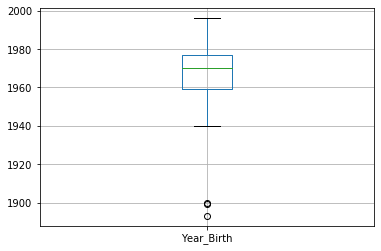

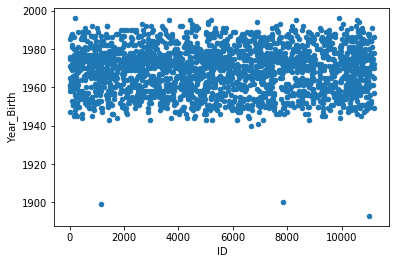

In [4]:
boxplot = dataframe.boxplot(column=['Year_Birth'])
dataframe.plot.scatter(y='Year_Birth', x='ID')

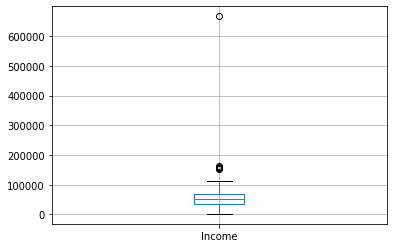

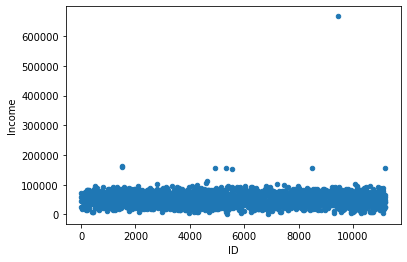

In [5]:
boxplot = dataframe.boxplot(column=['Income'])
dataframe.plot.scatter(y='Income', x='ID')

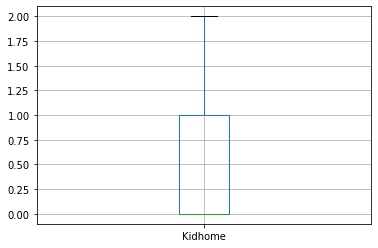

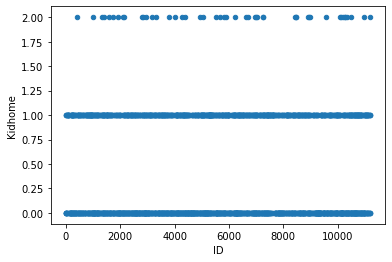

In [6]:
boxplot = dataframe.boxplot(column=['Kidhome'])
dataframe.plot.scatter(y='Kidhome', x='ID')

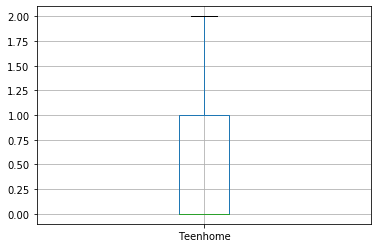

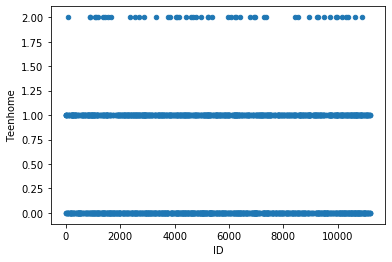

In [7]:
boxplot = dataframe.boxplot(column=['Teenhome'])
dataframe.plot.scatter(y='Teenhome', x='ID')

In [8]:
# boxplot = dataframe.boxplot(column=['Dt_Customer'])
# dataframe.plot.scatter(y='Teenhome', x='ID')
#print(dataframe[ np.abs(dataframe.Dt_Customer - dataframe.Dt_Customer.mean()) > 1.5*dataframe.Dt_Customer.std() ])


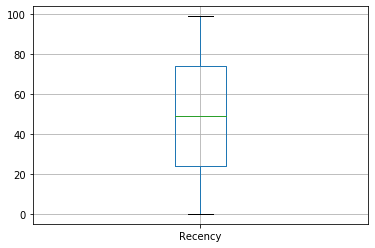

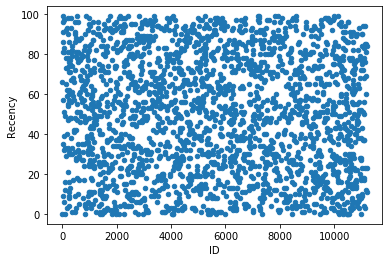

In [9]:
boxplot = dataframe.boxplot(column=['Recency'])
dataframe.plot.scatter(y='Recency', x='ID')

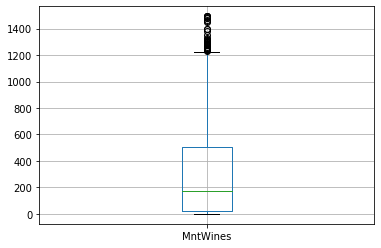

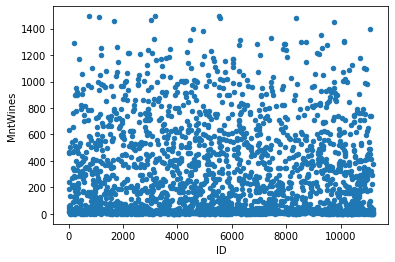

In [10]:
boxplot = dataframe.boxplot(column=['MntWines'])
dataframe.plot.scatter(y='MntWines', x='ID')

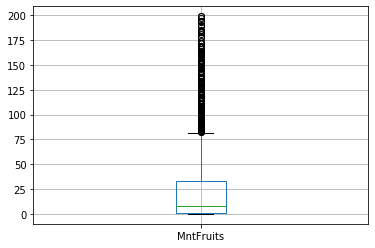

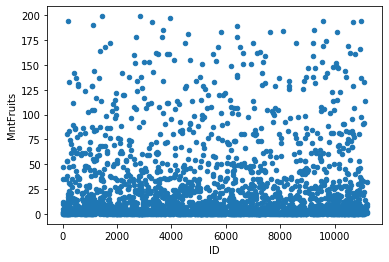

In [11]:
boxplot = dataframe.boxplot(column=['MntFruits'])
dataframe.plot.scatter(y='MntFruits', x='ID')

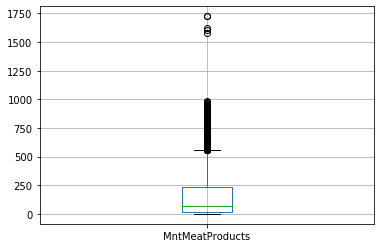

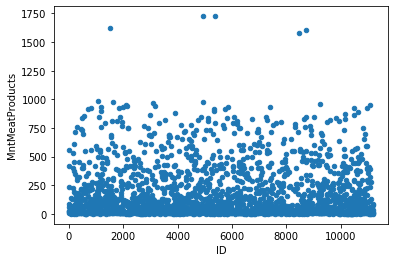

In [12]:
boxplot = dataframe.boxplot(column=['MntMeatProducts'])
dataframe.plot.scatter(y='MntMeatProducts', x='ID')

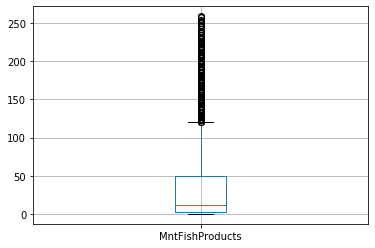

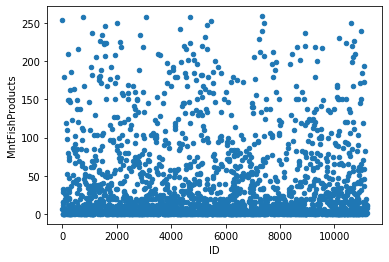

In [13]:
boxplot = dataframe.boxplot(column=['MntFishProducts'])
dataframe.plot.scatter(y='MntFishProducts', x='ID')

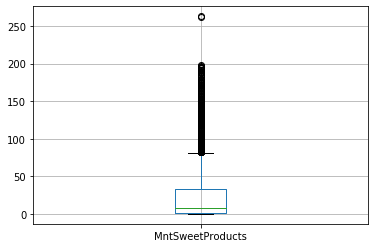

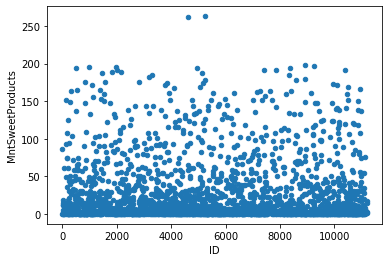

In [14]:
boxplot = dataframe.boxplot(column=['MntSweetProducts'])
dataframe.plot.scatter(y='MntSweetProducts', x='ID')

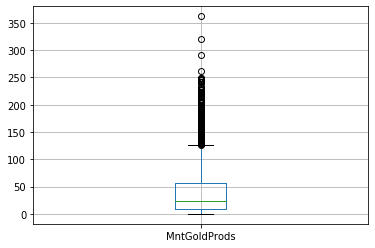

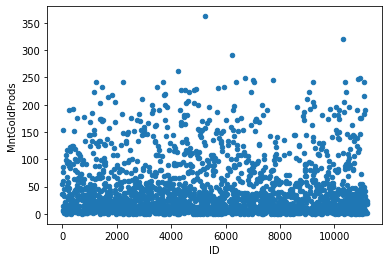

In [15]:
boxplot = dataframe.boxplot(column=['MntGoldProds'])
dataframe.plot.scatter(y='MntGoldProds', x='ID')

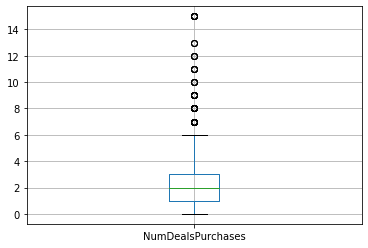

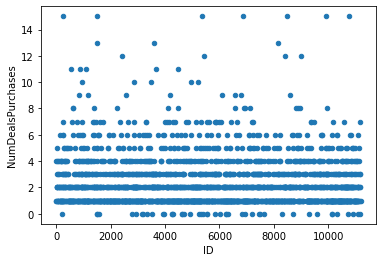

In [16]:
boxplot = dataframe.boxplot(column=['NumDealsPurchases'])
dataframe.plot.scatter(y='NumDealsPurchases', x='ID')

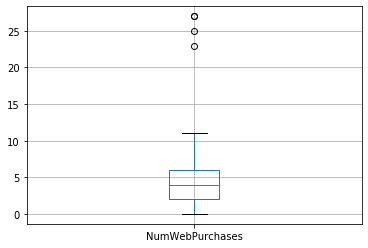

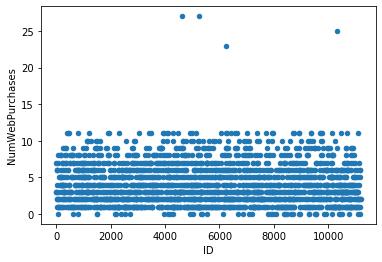

In [17]:
boxplot = dataframe.boxplot(column=['NumWebPurchases'])
dataframe.plot.scatter(y='NumWebPurchases', x='ID')

In [18]:
#We found outliers where people from all NumWebPurchases 0 which will not help us with analysis
#We will replace this outliers with mean.

mean_NumWebPurchases = dataframe.loc[dataframe['NumWebPurchases'] < 12, 'NumWebPurchases'].mean()
dataframe.loc[dataframe.NumWebPurchases >12, 'NumWebPurchases'] = np.nan
dataframe.fillna(mean_NumWebPurchases,inplace=True)

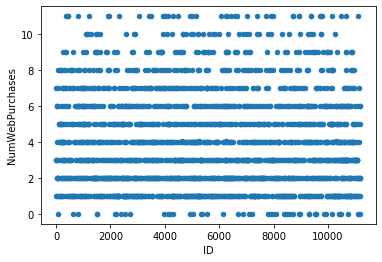

In [19]:
dataframe.plot.scatter(y='NumWebPurchases', x='ID')

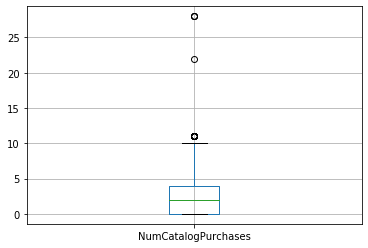

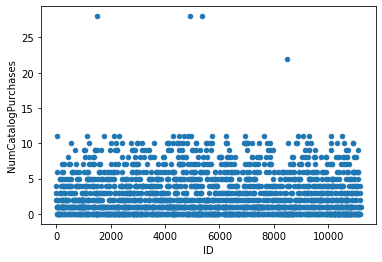

In [20]:
boxplot = dataframe.boxplot(column=['NumCatalogPurchases'])
dataframe.plot.scatter(y='NumCatalogPurchases', x='ID')

In [21]:
#We found outliers NumCatalogPurchases which will not help us with analysis
#We will replace this outliers with mean.

mean_NumCatalogPurchases = dataframe.loc[dataframe['NumCatalogPurchases'] < 12, 'NumCatalogPurchases'].mean()
dataframe.loc[dataframe.NumCatalogPurchases >12, 'NumCatalogPurchases'] = np.nan
dataframe.fillna(mean_NumCatalogPurchases,inplace=True)

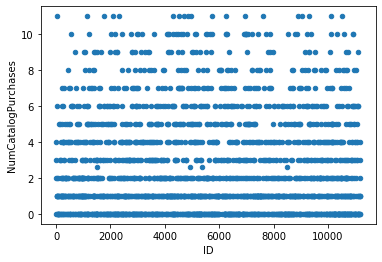

In [22]:
dataframe.plot.scatter(y='NumCatalogPurchases', x='ID')

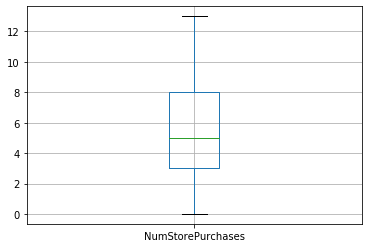

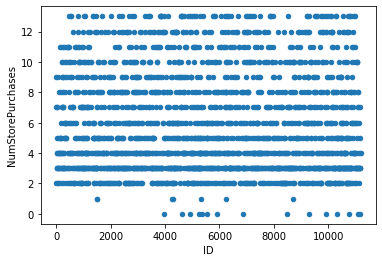

In [23]:
boxplot = dataframe.boxplot(column=['NumStorePurchases'])
dataframe.plot.scatter(y='NumStorePurchases', x='ID')

In [24]:
#We found outliers where people from all NumWebPurchases <2 which will not help us with analysis
#We will replace this outliers with mean.

mean_NumStorePurchases = dataframe.loc[dataframe['NumStorePurchases']>2, 'NumStorePurchases'].mean()
dataframe.loc[dataframe.NumStorePurchases <2, 'NumStorePurchases'] = np.nan
dataframe.fillna(mean_NumStorePurchases,inplace=True)

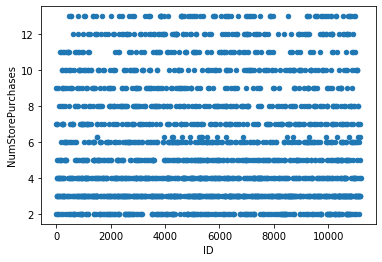

In [25]:
dataframe.plot.scatter(y='NumStorePurchases', x='ID')

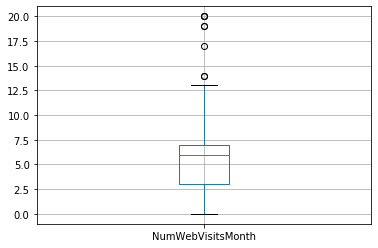

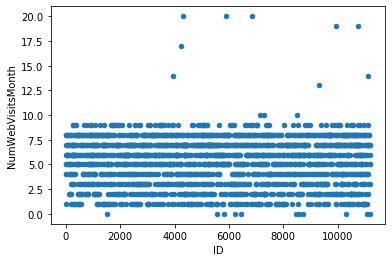

In [26]:
boxplot = dataframe.boxplot(column=['NumWebVisitsMonth'])
dataframe.plot.scatter(y='NumWebVisitsMonth', x='ID')

In [27]:
#We found outliers where people from all NumWebPurchases >10 which will not help us with analysis
#We will replace this outliers with mean.

mean_NumWebVisitsMonth = dataframe.loc[dataframe['NumWebVisitsMonth']<10, 'NumWebVisitsMonth'].mean()
dataframe.loc[dataframe.NumWebVisitsMonth>10, 'NumWebVisitsMonth'] = np.nan
dataframe.fillna(mean_NumWebVisitsMonth,inplace=True)

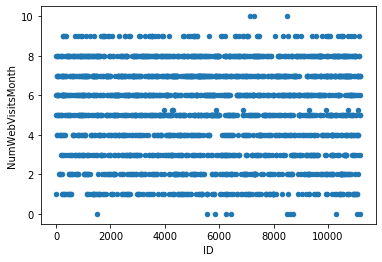

In [28]:
dataframe.plot.scatter(y='NumWebVisitsMonth', x='ID')

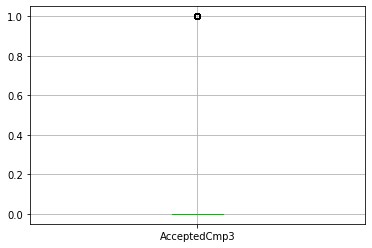

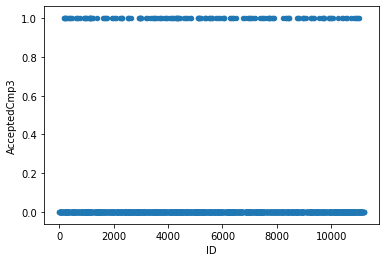

In [29]:
boxplot = dataframe.boxplot(column=['AcceptedCmp3'])
dataframe.plot.scatter(y='AcceptedCmp3', x='ID')

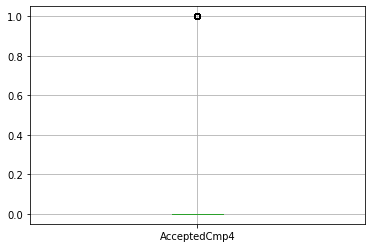

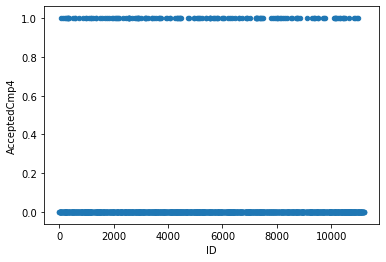

In [30]:
boxplot = dataframe.boxplot(column=['AcceptedCmp4'])
dataframe.plot.scatter(y='AcceptedCmp4', x='ID')

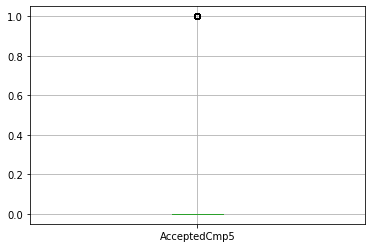

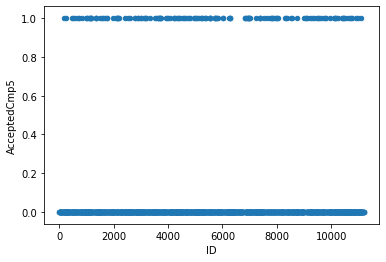

In [31]:
boxplot = dataframe.boxplot(column=['AcceptedCmp5'])
dataframe.plot.scatter(y='AcceptedCmp5', x='ID')

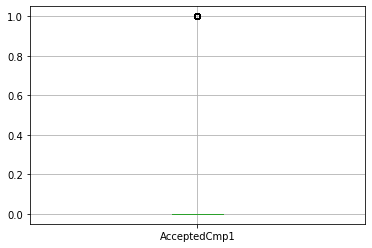

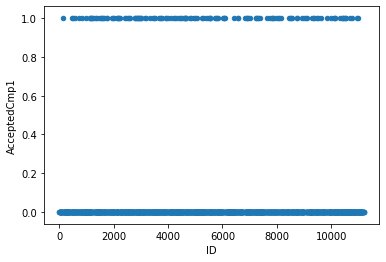

In [32]:
boxplot = dataframe.boxplot(column=['AcceptedCmp1'])
dataframe.plot.scatter(y='AcceptedCmp1', x='ID')

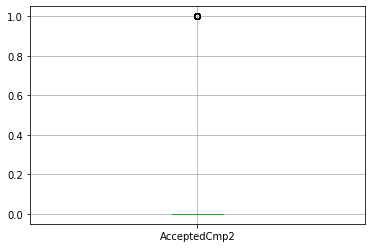

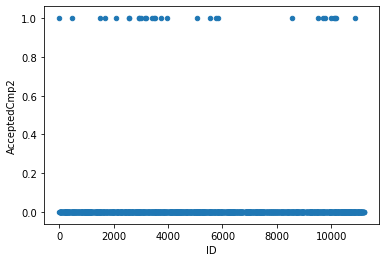

In [33]:
boxplot = dataframe.boxplot(column=['AcceptedCmp2'])
dataframe.plot.scatter(y='AcceptedCmp2', x='ID')

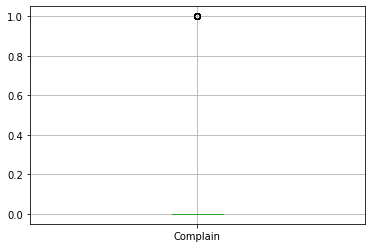

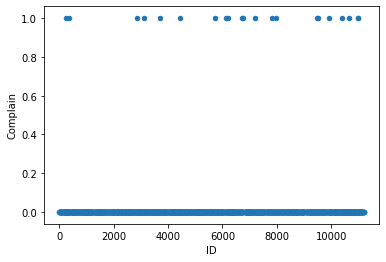

In [34]:
boxplot = dataframe.boxplot(column=['Complain'])
dataframe.plot.scatter(y='Complain', x='ID')

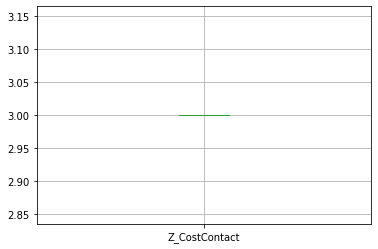

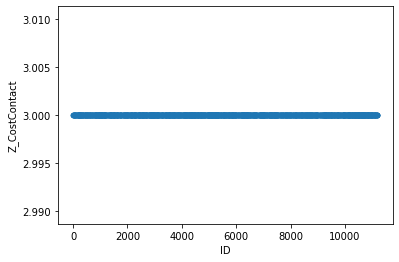

In [35]:
boxplot = dataframe.boxplot(column=['Z_CostContact'])
dataframe.plot.scatter(y='Z_CostContact', x='ID')

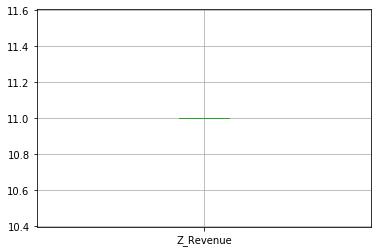

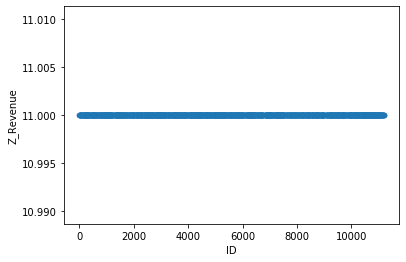

In [36]:
boxplot = dataframe.boxplot(column=['Z_Revenue'])
dataframe.plot.scatter(y='Z_Revenue', x='ID')

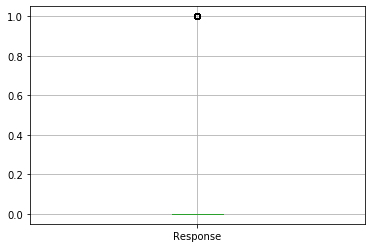

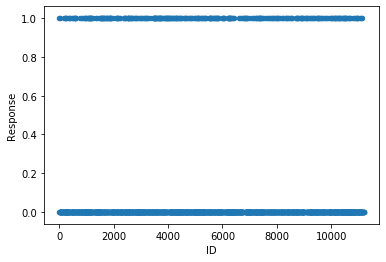

In [37]:
boxplot = dataframe.boxplot(column=['Response'])
dataframe.plot.scatter(y='Response', x='ID')

In [38]:
dataframe['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [39]:
dataframe['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [40]:
#dataframe["Dt_Customer"].value_counts()

# One Hot Encoding

In [41]:
dataframe = pd.get_dummies(dataframe, columns=["Marital_Status"])
dataframe = pd.get_dummies(dataframe, columns=["Education"])




In [42]:
import datetime
for i in range(0,len(dataframe['Dt_Customer'])):
    dataframe['Dt_Customer'][i] = datetime.datetime.strptime(dataframe['Dt_Customer'][i],'%Y-%m-%d')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
dataframe['dt_year'] = pd.to_numeric(dataframe['Dt_Customer'].dt.year)
dataframe['dt_month'] = pd.to_numeric(dataframe['Dt_Customer'].dt.month)
dataframe['dt_day'] = pd.to_numeric(dataframe['Dt_Customer'].dt.day)
dataframe['Year_Birth']=pd.to_numeric(dataframe['Year_Birth'])

In [44]:
del dataframe['Dt_Customer']

In [45]:
dataframe_original = dataframe.copy()

# Model 

In [46]:
y_logr=dataframe[['Response']]
x_logr=dataframe.drop(['Response'],axis=1)



In [47]:
dataframe.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD', 'dt_year',
       'dt_month', 'dt_day'],
      dtype='object')

In [48]:
dataframe.dtypes

ID                           int64
Year_Birth                   int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases            float64
NumCatalogPurchases        float64
NumStorePurchases          float64
NumWebVisitsMonth          float64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Complain                     int64
Z_CostContact                int64
Z_Revenue                    int64
Response                     int64
Marital_Status_Absurd        uint8
Marital_Status_Alone         uint8
Marital_Status_Divor

In [49]:
Xlog2 = sm.add_constant(x_logr) 
# logr_model = sm.Logit(y_logr, Xlog2)
# logr_fit = logr_model.fit()
# print(logr_fit.summary())


In [50]:
logr_model = sm.Logit(y_logr, Xlog2)


In [51]:
logr_fit = logr_model.fit()


Optimization terminated successfully.
         Current function value: 0.239633
         Iterations 27


In [52]:
print(logr_fit.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2202
Method:                           MLE   Df Model:                           37
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:                  0.4310
Time:                        21:19:43   Log-Likelihood:                -536.78
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                8.193e-147
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ID                      -1.426e-05   2.48e-05     -0.575      0.565   -6.29e-05    3.43e-05
Year_Birth                 -0.0071      0.007     -0.969      0.333      -0.021       0.007


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [53]:
# Checking accuracy of the model with all variables 
# Lets check accuracy, precision, recall of this model 

y=dataframe[['Response']]
X=dataframe.drop(['Response'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 80% training and 20% test

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logistic_regression = LogisticRegression()
model = logistic_regression.fit(X,y)

#Predict the response for test dataset
y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8392857142857143
Precision: 0.4444444444444444
Recall: 0.11428571428571428


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Removing non important columns which have alpha more than 0.05

In [54]:
print(logr_fit.pvalues > 0.05)

ID                          True
Year_Birth                  True
Income                      True
Kidhome                     True
Teenhome                   False
Recency                    False
MntWines                   False
MntFruits                   True
MntMeatProducts            False
MntFishProducts             True
MntSweetProducts            True
MntGoldProds                True
NumDealsPurchases          False
NumWebPurchases             True
NumCatalogPurchases        False
NumStorePurchases          False
NumWebVisitsMonth          False
AcceptedCmp3               False
AcceptedCmp4               False
AcceptedCmp5               False
AcceptedCmp1               False
AcceptedCmp2               False
Complain                    True
Z_CostContact              False
Z_Revenue                   True
Marital_Status_Absurd       True
Marital_Status_Alone        True
Marital_Status_Divorced     True
Marital_Status_Married      True
Marital_Status_Single       True
Marital_St

In [55]:
non_imp_columns = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 
                   'MntGoldProds', 'NumWebPurchases', 'Complain','Z_Revenue','Marital_Status_Absurd','Marital_Status_Alone',
                  'Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Marital_Status_Together','Marital_Status_Widow',
                  'Marital_Status_YOLO','dt_day']

In [56]:
dataframe = dataframe.drop(columns=non_imp_columns)

In [57]:
dataframe.columns

Index(['Teenhome', 'Recency', 'MntWines', 'MntMeatProducts',
       'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'dt_year', 'dt_month'],
      dtype='object')

In [58]:
y_logr=dataframe[['Response']]
x_logr=dataframe.drop(['Response'],axis=1)
Xlog2 = sm.add_constant(x_logr) 
logr_model = sm.Logit(y_logr, Xlog2)
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.259489
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2220
Method:                           MLE   Df Model:                           19
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:                  0.3839
Time:                        21:19:43   Log-Likelihood:                -581.26
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                2.573e-141
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Teenhome                -0.9172      0.183     -5.004      0.000      -1.276      -0.558

In [59]:
print(logr_fit.pvalues > 0.05)

Teenhome                False
Recency                 False
MntWines                 True
MntMeatProducts         False
NumDealsPurchases       False
NumCatalogPurchases     False
NumStorePurchases       False
NumWebVisitsMonth       False
AcceptedCmp3            False
AcceptedCmp4            False
AcceptedCmp5            False
AcceptedCmp1            False
AcceptedCmp2            False
Z_CostContact            True
Education_2n Cycle       True
Education_Basic          True
Education_Graduation     True
Education_Master         True
Education_PhD            True
dt_year                 False
dt_month                False
dtype: bool


In [60]:
non_imp_columns = ['MntWines','Z_CostContact','Education_2n Cycle',
                   'Education_Basic','Education_Graduation','Education_Master','Education_PhD']

In [61]:
dataframe = dataframe.drop(columns=non_imp_columns)

In [62]:
dataframe.columns

Index(['Teenhome', 'Recency', 'MntMeatProducts', 'NumDealsPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'dt_year', 'dt_month'],
      dtype='object')

In [63]:
y_logr=dataframe[['Response']]
x_logr=dataframe.drop(['Response'],axis=1)
Xlog2 = sm.add_constant(x_logr) 
logr_model = sm.Logit(y_logr, Xlog2)
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.269299
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2225
Method:                           MLE   Df Model:                           14
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:                  0.3606
Time:                        21:19:43   Log-Likelihood:                -603.23
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                4.073e-136
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2442.9524    341.003      7.164      0.000    1774.599    3111.306
T

In [64]:
dataframe = dataframe.drop(columns='AcceptedCmp2')
y_logr=dataframe[['Response']]
x_logr=dataframe.drop(['Response'],axis=1)
Xlog2 = sm.add_constant(x_logr) 
logr_model = sm.Logit(y_logr, Xlog2)
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.270597
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2226
Method:                           MLE   Df Model:                           13
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:                  0.3575
Time:                        21:19:43   Log-Likelihood:                -606.14
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                9.640e-136
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2421.3812    339.839      7.125      0.000    1755.309    3087.453
T

## This model has the best of all variables, none of tham have p value greater than 0.05

In [65]:
# Lets check accuracy, precision, recall of this model 
y=dataframe[['Response']]
X=dataframe.drop(['Response'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 80% training and 20% test

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logistic_regression = LogisticRegression()
model = logistic_regression.fit(X,y)

#Predict the response for test dataset
y_pred = model.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8459821428571429
Precision: 0.5151515151515151
Recall: 0.24285714285714285


# Building SVM Model

In [68]:
#Working with original dataframe which has all the columns without feature selection
dataframe_original.head(10)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,dt_year,dt_month,dt_day
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,0,0,2012,9,4
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,1,0,0,2014,3,8
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,1,0,0,2013,8,21
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,1,0,0,2014,2,10
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,1,2014,1,19
5,7446,1967,62513.0,0,1,16,520,42,98,0,...,0,0,0,0,0,1,0,2013,9,9
6,965,1971,55635.0,0,1,34,235,65,164,50,...,0,0,0,0,1,0,0,2012,11,13
7,6177,1985,33454.0,1,0,32,76,10,56,3,...,0,0,0,0,0,0,1,2013,5,8
8,4855,1974,30351.0,1,0,19,14,0,24,3,...,0,0,0,0,0,0,1,2013,6,6
9,5899,1950,5648.0,1,1,68,28,0,6,1,...,0,0,0,0,0,0,1,2014,3,13


In [69]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y=dataframe_original[['Response']]
X=dataframe_original.drop(['Response'],axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 80% training and 20% test

In [70]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8482142857142857
Precision: 0.5384615384615384
Recall: 0.2
